# Relationships Between World Diabetes Trends and Economic Changes  

## UNCC Data Analytics and Visualization - Project 1

### Fantastic Four - *Ayo, Mark, Neba, and Scott*


# Data Analysis Notebook

## Introduction

For this project the team compared four economic indicators with diabetes trends over the period 1990 to 2014.  The diabetes trends were from the [Non-Communicable Dieases Risk Factor Collaboration (NCD-RisC)](http://ncdrisc.org/about-us.html).  This group of health scientist working with the World Health Organization has published data on risk factors at [http://ncdrisc.org/data-downloads.html](http://ncdrisc.org/data-downloads.html).  The team used this data to generate diabetes trends for 217 countries included in the datasets.  Trend data form BMI and Blood pressure were also included, but in order to keep the scope under control, the team has focused on diabetes trends. 

Each team member selected a data set from the World Bank or United Nations to compare with diabetes trends.  The four indicators selected are shown below.

    * United Nations - Human Development index
    * World Bank - Number of Mobile Subscriptions per 100 people
    * World Bank - Access to electricity (% of population)
    * World Bank - CPIA property rights and rule-based governance rating (1=low to 6=high)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from WBlib import get_data
sns.set()

In [2]:
titles = {"IT.CEL.SETS.P2":"mobile phone subscriptions per 100 people","EG.ELC.ACCS.ZS":"Access to electricity (% of population)","IQ.CPA.PROP.XQ":"CPIA property rights and rule-based governance rating (1=low to 6=high)"}
all_data = pd.read_csv('data/all_data.csv')

In [3]:

all_data['bins'] = all_data['bins'].apply(str)
all_data['EG.ELC.ACCS.ZS'] = all_data['EG.ELC.ACCS.ZS'].apply(lambda x: np.nan if x <= 0.05 else x)

all_data.head()

,Unnamed: 0,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Country,HDIrank2017,HDIvalue,Year in Text,Cut_1,Cut_2,Cut_3,Cut_4,bins,Unnamed: 0.1,IT.CEL.SETS.P2,EG.ELC.ACCS.ZS,IQ.CPA.PROP.XQ
0,0,AFG,Men,1990,0.061930,0.033981,Afghanistan,168,NaN,HDI 1990,0.4126,0.5804,0.6712,0.7448,nan,24,0.0,NaN,NaN
1,1,AFG,Men,1991,0.063769,0.035938,Afghanistan,168,NaN,HDI 1991,0.4182,0.5846,0.6660,0.7486,nan,23,0.0,NaN,NaN
2,2,AFG,Men,1992,0.065540,0.037836,Afghanistan,168,NaN,HDI 1992,0.4140,0.5870,0.6640,0.7530,nan,22,0.0,NaN,NaN
3,3,AFG,Men,1993,0.067237,0.039230,Afghanistan,168,NaN,HDI 1993,0.4212,0.5890,0.6694,0.7632,nan,21,0.0,NaN,NaN
4,4,AFG,Men,1994,0.068867,0.040853,Afghanistan,168,NaN,HDI 1994,0.4242,0.5950,0.6710,0.7678,nan,20,0.0,NaN,NaN


In [4]:
no_nan_data = all_data.loc[all_data['bins'] != 'nan']

In [5]:
quintile_1 = all_data.groupby(['bins']).get_group('1.0')
quintile_3 = all_data.groupby(['bins']).get_group('3.0')
quintile_5 = all_data.groupby(['bins']).get_group('5.0')

nquintile_1 = no_nan_data.groupby(['bins']).get_group('1.0')
nquintile_3 = no_nan_data.groupby(['bins']).get_group('3.0')
nquintile_5 = no_nan_data.groupby(['bins']).get_group('5.0')

In [6]:
no_nan_countries = no_nan_data.groupby(['Year']).median()
quintile_1 = quintile_1.groupby(['Year']).median()
quintile_3 = quintile_3.groupby(['Year']).median()
quintile_5 = quintile_5.groupby(['Year']).median()

nquintile_1 = nquintile_1.groupby(['Year']).median()
nquintile_3 = nquintile_3.groupby(['Year']).median()
nquintile_5 = nquintile_5.groupby(['Year']).median()

In [7]:
quintile_5.head(24)

,Unnamed: 0,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,HDIrank2017,HDIvalue,Cut_1,Cut_2,Cut_3,Cut_4,Unnamed: 0.1,IT.CEL.SETS.P2,EG.ELC.ACCS.ZS,IQ.CPA.PROP.XQ
Year,,,,,,,,,,,,,
1990,1875.0,0.056729,0.034840,16.0,0.7950,0.4126,0.5804,0.6712,0.7448,2399.0,0.799882,100.0,NaN
1991,1876.0,0.058035,0.035465,16.0,0.8000,0.4182,0.5846,0.6660,0.7486,2398.0,1.136048,100.0,NaN
1992,1877.0,0.059406,0.035855,16.0,0.8070,0.4140,0.5870,0.6640,0.7530,2397.0,1.497647,100.0,NaN
1993,1878.0,0.060336,0.036662,16.0,0.8140,0.4212,0.5890,0.6694,0.7632,2396.0,2.203646,100.0,NaN
1994,1879.0,0.060698,0.037478,16.0,0.8230,0.4242,0.5950,0.6710,0.7678,2395.0,3.500587,100.0,NaN
1995,1892.5,0.061420,0.038179,15.5,0.8255,0.4280,0.5988,0.6730,0.7720,2406.5,7.601738,100.0,NaN
1996,1893.5,0.062825,0.039550,15.5,0.8305,0.4346,0.6068,0.6788,0.7768,2405.5,11.514722,100.0,NaN
1997,1894.5,0.064133,0.040769,15.5,0.8375,0.4432,0.6134,0.6866,0.7788,2404.5,14.907903,100.0,NaN
1998,1895.5,0.063658,0.040923,15.5,0.8450,0.4512,0.6178,0.6918,0.7866,2403.5,25.170150,100.0,NaN


## Diabetes

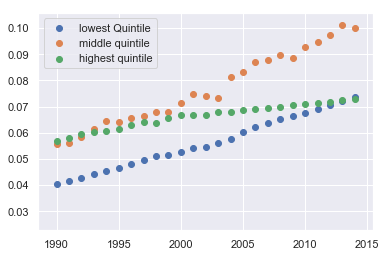

In [8]:
fig, axes = plt.subplots()

plt.scatter(quintile_1.index, quintile_1['Age-standardised diabetes prevalence'])
plt.scatter(quintile_3.index, quintile_3['Age-standardised diabetes prevalence'])
plt.scatter(quintile_5.index, quintile_5['Age-standardised diabetes prevalence'])
plt.legend(["lowest Quintile", "middle quintile", "highest quintile"])


Text(0.5, 1.0, 'Prevalence of Diabetes (All Countries)')

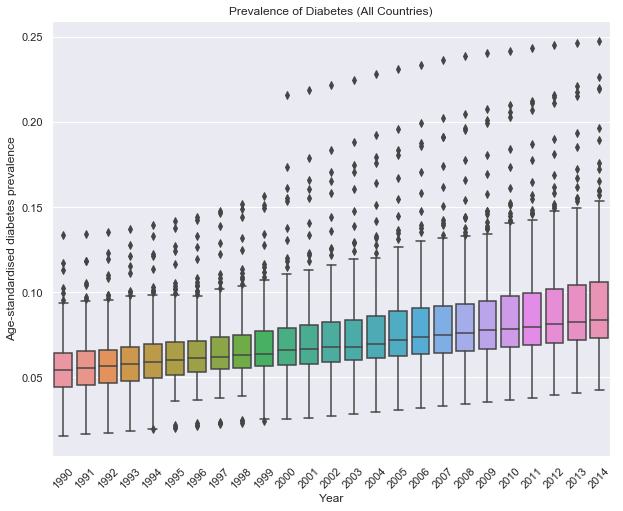

In [9]:
fig, axes = plt.subplots(figsize=(10,8))
g=sns.boxplot(no_nan_data['Year'],no_nan_data['Age-standardised diabetes prevalence'],orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_ylabel(f"Age-standardised diabetes prevalence")
plt.title(f"Prevalence of Diabetes (All Countries)")

In [10]:
high_DM = no_nan_data.loc[no_nan_data['Age-standardised diabetes prevalence'] > 0.21]
high_DM.head(34)

,Unnamed: 0,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Country,HDIrank2017,HDIvalue,Year in Text,Cut_1,Cut_2,Cut_3,Cut_4,bins,Unnamed: 0.1,IT.CEL.SETS.P2,EG.ELC.ACCS.ZS,IQ.CPA.PROP.XQ
2071,2071,KIR,Men,2011,0.212324,0.139744,Kiribati,134,0.590,HDI 2011,0.5294,0.6700,0.7510,0.8276,2.0,2553,13.174591,74.413933,3.5
2072,2072,KIR,Men,2012,0.214822,0.136272,Kiribati,134,0.598,HDI 2012,0.5320,0.6778,0.7562,0.8356,2.0,2552,16.883495,76.506287,3.5
2073,2073,KIR,Men,2013,0.217433,0.131498,Kiribati,134,0.609,HDI 2013,0.5384,0.6866,0.7574,0.8440,2.0,2551,18.427235,78.607651,3.5
2074,2074,KIR,Men,2014,0.220140,0.126964,Kiribati,134,0.616,HDI 2014,0.5450,0.6922,0.7634,0.8486,2.0,2550,27.159644,80.715019,3.5
2960,2960,PLW,Men,2000,0.215620,0.157194,Palau,60,0.743,HDI 2000,0.4496,0.6118,0.6892,0.7854,4.0,3764,NaN,98.414497,NaN
2961,2961,PLW,Men,2001,0.218583,0.160114,Palau,60,0.747,HDI 2001,0.4556,0.6144,0.6960,0.7904,4.0,3763,NaN,98.418396,NaN
2962,2962,PLW,Men,2002,0.221692,0.163134,Palau,60,0.751,HDI 2002,0.4570,0.6180,0.6980,0.7920,4.0,3762,12.557474,98.409943,NaN
2963,2963,PLW,Men,2003,0.224812,0.165805,Palau,60,0.754,HDI 2003,0.4642,0.6238,0.7062,0.8024,4.0,3761,19.918782,98.395203,NaN
2964,2964,PLW,Men,2004,0.227969,0.168968,Palau,60,0.758,HDI 2004,0.4690,0.6350,0.7138,0.8034,4.0,3760,19.814179,98.380249,NaN
2965,2965,PLW,Men,2005,0.230943,0.170971,Palau,60,0.760,HDI 2005,0.4774,0.6344,0.7262,0.8072,4.0,3759,30.397870,98.916507,NaN


## Mobiles

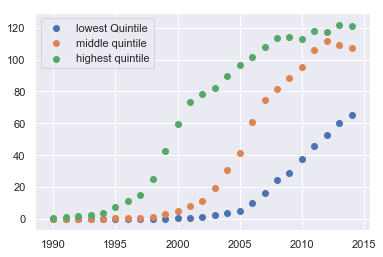

In [11]:
fig, axes = plt.subplots()

plt.scatter(quintile_1.index, quintile_1['IT.CEL.SETS.P2'])
plt.scatter(quintile_3.index, quintile_3['IT.CEL.SETS.P2'])
plt.scatter(quintile_5.index, quintile_5['IT.CEL.SETS.P2'])
plt.legend(["lowest Quintile", "middle quintile", "highest quintile"])

Text(0.5, 1.0, 'Annual Mobile Subscriptions per 100 (All Countries)')

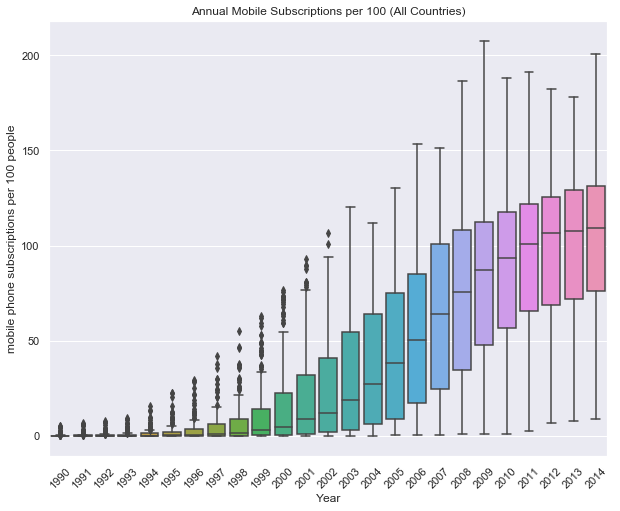

In [12]:
fig, axes = plt.subplots(figsize=(10,8))
g=sns.boxplot(no_nan_data['Year'],no_nan_data['IT.CEL.SETS.P2'],orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_ylabel(f"{titles['IT.CEL.SETS.P2']}")
plt.title(f"Annual Mobile Subscriptions per 100 (All Countries)")

## Electricity

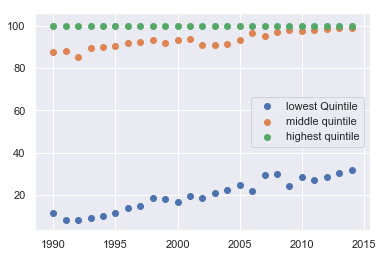

In [13]:
fig, axes = plt.subplots()
#plt.scatter(all_countries.index, all_countries['EG.ELC.ACCS.ZS'])
plt.scatter(quintile_1.index, quintile_1['EG.ELC.ACCS.ZS'])
plt.scatter(quintile_3.index, quintile_3['EG.ELC.ACCS.ZS'])
plt.scatter(quintile_5.index, quintile_5['EG.ELC.ACCS.ZS'])
plt.legend(["lowest Quintile", "middle quintile", "highest quintile"])

Text(0.5, 1.0, 'Annual Access to Electricities (All Countries)')

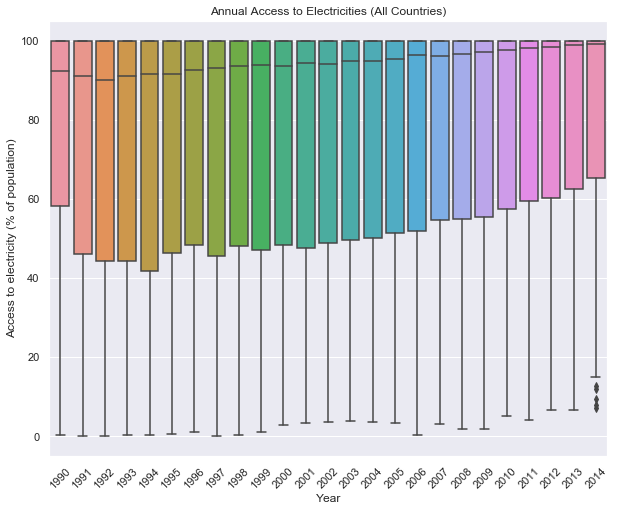

In [15]:
fig, axes = plt.subplots(figsize=(10,8))
g=sns.boxplot(no_nan_data['Year'],no_nan_data['EG.ELC.ACCS.ZS'],orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_ylabel(f"{titles['EG.ELC.ACCS.ZS']}")
plt.title(f"Annual Access to Electricities (All Countries)")

## Governance

In [16]:
all_data['IQ.CPA.PROP.XQ'] = all_data['IQ.CPA.PROP.XQ'].apply(str)

In [17]:
gov_nan_data = all_data.loc[all_data['IQ.CPA.PROP.XQ'] != 'nan']

In [18]:
gov_nan_data = gov_nan_data.set_index('Year')

In [25]:
gov_score_1 = gov_nan_data.groupby(['IQ.CPA.PROP.XQ']).get_group('1.0')
gov_score_15 = gov_nan_data.groupby(['IQ.CPA.PROP.XQ']).get_group('1.5')
gov_score_2 = gov_nan_data.groupby(['IQ.CPA.PROP.XQ']).get_group('2.0')
gov_score_25 = gov_nan_data.groupby(['IQ.CPA.PROP.XQ']).get_group('2.5')
gov_score_3 = gov_nan_data.groupby(['IQ.CPA.PROP.XQ']).get_group('3.0')
gov_score_35 = gov_nan_data.groupby(['IQ.CPA.PROP.XQ']).get_group('3.5')
gov_score_4 = gov_nan_data.groupby(['IQ.CPA.PROP.XQ']).get_group('4.0')

In [26]:
gov1  = gov_score_1.groupby(['Year']).median()
gov15 = gov_score_15.groupby(['Year']).median()
gov2  = gov_score_2.groupby(['Year']).median()
gov25 = gov_score_25.groupby(['Year']).median()
gov3  = gov_score_3.groupby(['Year']).median()
gov35 = gov_score_35.groupby(['Year']).median()
gov4  = gov_score_4.groupby(['Year']).median()

Text(0, 0.5, 'Age-standardised diabetes prevalence')

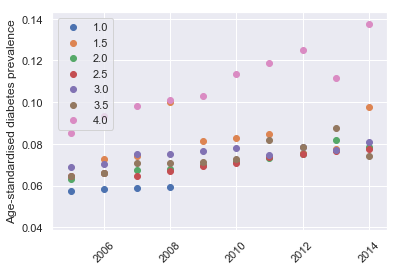

In [27]:
fig, axes = plt.subplots(figsize=(6,4))

plt.scatter(gov1.index, gov1['Age-standardised diabetes prevalence'])
plt.scatter(gov15.index, gov15['Age-standardised diabetes prevalence'])
plt.scatter(gov2.index, gov2['Age-standardised diabetes prevalence'])
plt.scatter(gov25.index, gov25['Age-standardised diabetes prevalence'])
plt.scatter(gov3.index, gov3['Age-standardised diabetes prevalence'])
plt.scatter(gov35.index, gov35['Age-standardised diabetes prevalence'])
plt.scatter(gov4.index, gov4['Age-standardised diabetes prevalence'])
plt.legend(["1.0", "1.5", "2.0","2.5","3.0","3.5","4.0"])
plt.xticks(rotation=45)
plt.ylabel(f"Age-standardised diabetes prevalence")

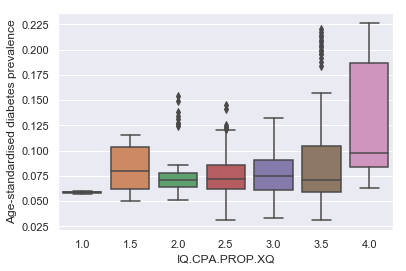

In [28]:

sns.boxplot(x="IQ.CPA.PROP.XQ", y="Age-standardised diabetes prevalence", data=no_nan_data)
plt.show()